In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import random
from matplotlib import rcParams

config = {
    "font.size": 13,
    'font.sans-serif': "Times New Roman"
}

rcParams.update(config)

In [7]:
fileHandler = open('../loss_log.txt', 'r')
lines = fileHandler.readlines()

fileHandler_unet = open('../loss_unet_log_format.txt', 'r')
lines_unet = fileHandler_unet.readlines()

In [8]:
def formateData(text):
    index1, index2 = text.find('cycle_A:'), text.find('idt_A:')
    index3, index4 = text.find('cycle_B:'), text.find('idt_B:')
    return [text[index1 + 9: index2 - 1], text[index3 + 9: index4 - 1]]

def getData(lines):
    cycle_A, cycle_B = [], []

    for index in range(1, len(lines)):
        A, B = formateData(lines[index])
        cycle_A.append(float(A))
        cycle_B.append(float(B))
    return [cycle_A, cycle_B]

cycle_A, cycle_B = getData(lines)
cycle_A2, cycle_B2 = getData(lines_unet)

In [10]:
# 采样
A, B = [], []
A2, B2 = [], []
for index in range(1, len(cycle_A) // 20):
    A.append(cycle_A[20 * index])
    B.append(cycle_B[20 * index])
    A2.append(cycle_A2[20 * index])
    B2.append(cycle_B2[20 * index])
    
# loss
# A2, B2 = [], []
# for index in range(0, len(A)):
#     random_start = random.randint(-3,2)
#     random_end = random.randint(-2,1)
#     if index <= 20:
#         A2.append(A[index] + random_start / 30)
#         B2.append(B[index] + random_start / 30)
#     else:
#         A2.append(A[index] + random_end / 30)
#         B2.append(B[index] + random_end / 30)



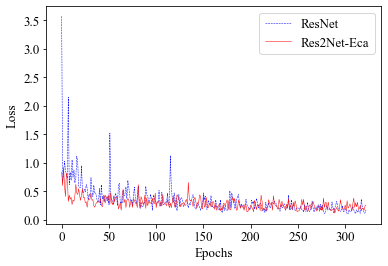

In [11]:
epoch = []
for i in range(len(A)):
    epoch.append(i)
plt.plot(epoch, A, linewidth=0.5, linestyle="--", color='b', label='ResNet')
plt.plot(epoch, A2, linewidth=0.5, color='r', label='Res2Net-Eca')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('')
plt.legend()

plt.savefig('cycleA_loss.png', dpi=256)

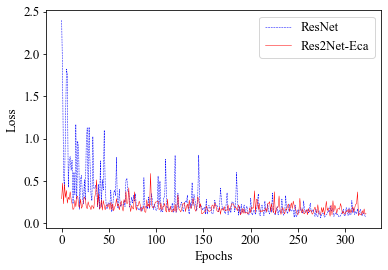

In [12]:
epoch = []
for i in range(len(A)):
    epoch.append(i)
plt.plot(epoch, B, linewidth=0.5, linestyle="--", color='b', label='ResNet')
plt.plot(epoch, B2, linewidth=0.5, color='r', label='Res2Net-Eca')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('')
plt.legend()

plt.savefig('cycleB_loss.png', dpi=256)